# Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pd.options.display.max_columns = None
pd.options.display.max_rows = None

%matplotlib inline

# Load dataset

In [2]:
censusIncome = pd.read_csv('../data/census-income.data', sep=',')
censusIncome.sample(frac=1, random_state=42).reset_index(drop=True)
censusIncome.head(10)

print('Size of our data-set ', censusIncome.size)

Size of our data-set  8379966


# Transform the data

In [3]:
# Store the numerical data
dataNumerical = [
    # 'age',
    'wage per hour',
    # 'num persons worked for employer',
    # 'veterans benefits',
    'weeks worked in year',
]

# Store the categorical data
dataCategorical = [
    # 'class of worker',
    'education',
    # 'marital stat',
    'race',
    # 'hispanic origin',
    'sex',
    # 'reason for unemployment',
    # 'detailed household summary in household',
    # 'citizenship',
    # 'year',
]

# Fix the high values of the wage per hour
censusIncome['wage per hour'] = censusIncome['wage per hour'].apply(lambda w: w / 100)

# censusIncomeCopy = censusIncome.copy(deep=True)

# Filter some data

filteredCensus = censusIncome[
    (censusIncome['class of worker'] != ' Not in universe') &
    (censusIncome['education'] != ' Children') &
    (censusIncome['wage per hour'] > 0)
    ]

filteredData = filteredCensus.copy(deep=True)

importantColumns = dataCategorical + dataNumerical

# Encode the object as an enumerated type or categorical variable.
# https://pandas.pydata.org/docs/reference/api/pandas.factorize.html
for c in dataCategorical:
    # factorize returns an array of numerical categories and uniques => we are only interested in numerical categories => take index [0]
    # start the categories by one, not zero => + 1
    filteredData[c] = pd.factorize(filteredData[c])[0] + 1

# Get only the important data
importantData = filteredData[importantColumns]

importantColumns1 = importantColumns + ['sex']
filteredCensusCopy = filteredData[importantColumns1]

# Show the reduction
importantData.head()

,education,race,sex,wage per hour,weeks worked in year
5,1,1,1,12.00,52
8,1,2,1,8.76,52
22,1,2,1,5.00,32
49,1,2,2,4.00,52
147,2,2,1,4.50,48


# Dimensionality Reduction

In [4]:
# Parse every value to a float
importantData = importantData.apply(lambda c1: c1.apply(lambda value: float(value)))
cleanedData = importantData.to_numpy()

print('The data was reduced to', cleanedData.size, 'from', importantData.size, 'samples.')

sizeSample = 1500
cleanedDataSub = cleanedData[:sizeSample,:]

The data was reduced to 56520 from 56520 samples.


## MDS (Multidimensional scaling)

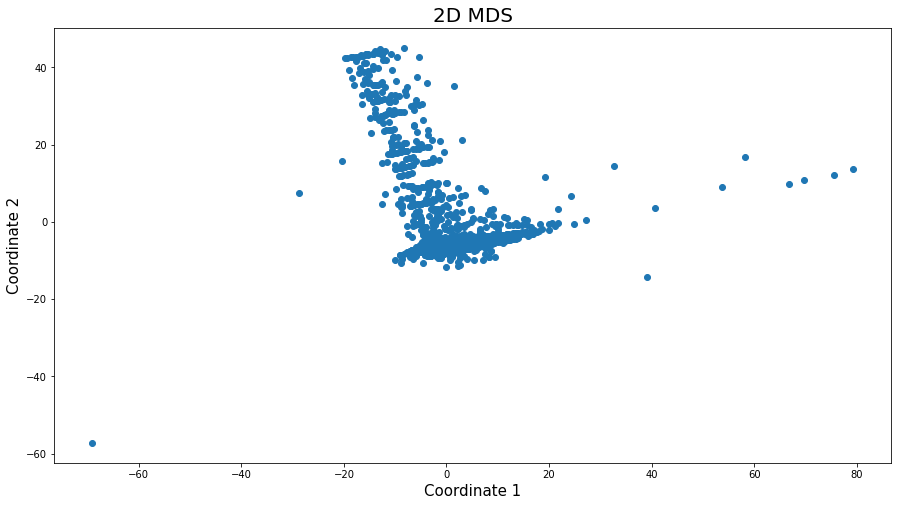

2317001.969531625


In [5]:
mds = MDS(random_state=0, metric=True, n_init=4, max_iter=300)
principalComponents = mds.fit_transform(cleanedDataSub)
principalDf = pd.DataFrame(data = principalComponents)
principleArray = principalDf.to_numpy()

fig = plt.figure(figsize = (15,8))
plt.scatter(principleArray[:,0], principleArray[:,1])
plt.xlabel('Coordinate 1', fontsize = 15)
plt.ylabel('Coordinate 2', fontsize = 15)
plt.title('2D MDS', fontsize = 20)
plt.show()

stress = mds.stress_
print(stress)

In this graph an MDS is shown.
I took a subset of 1500 data points, otherwise the computation didn't finish for this big data-set. The coordinate 1 has a lower variance than that of coordinate 2. Coordinate 1 has some outliers to the right and only a few to the left. Coordinate 2 has an outlier in the bottom left.

## PCA (Principle component analyse)

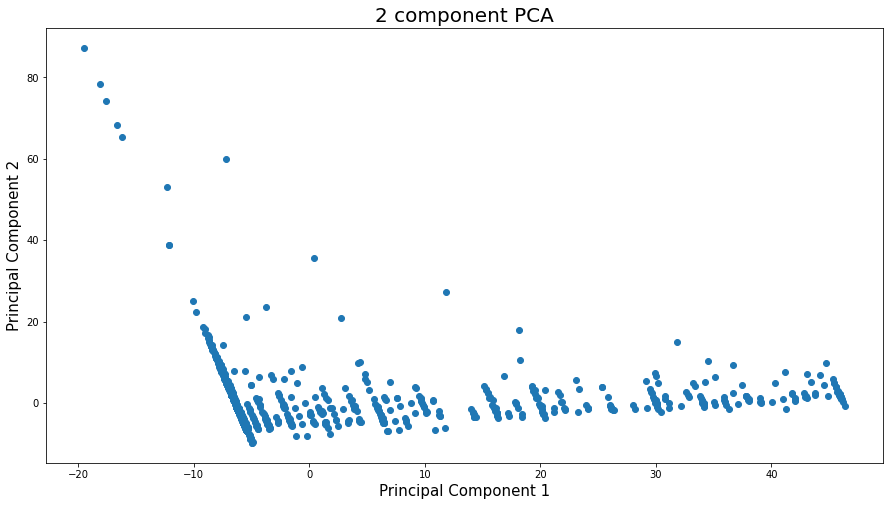

Principle component 1 contains 76.0 of the variance
Principle component 2 contains 21.0 of the variance
The combined variance is 96.0


In [6]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

# standardize the dataset’s features
# cleanedData = StandardScaler().fit_transform(cleanedData)

# Project on two dimensions
pca = PCA(n_components=2, )

principalComponents = pca.fit_transform(cleanedDataSub)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
# finalDf = pd.concat([principalDf, filteredCensusCopy[['sex']]], axis = 1)
principleArray = principalDf.to_numpy()

fig = plt.figure(figsize = (15,8))
plt.scatter(principleArray[:,0], principleArray[:,1])
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
plt.show()

# Explain variance

pcaVariance = pca.explained_variance_ratio_
pc1Variance = round(pcaVariance[0], 3)
pc2Variance = round(pcaVariance[1], 3)

print('Principle component 1 contains', round(pc1Variance, 2) * 100, 'of the variance')
print('Principle component 2 contains', round(pc2Variance, 2) * 100, 'of the variance')
print('The combined variance is', round(pc1Variance + pc2Variance, 2) * 100)


To make it comparable to the MDS, I also took a sample of 1500 from my data. PCA was very fast, even when the input is very big. In this example a two dimensional principle component analysis was performed. The variance alongside the 1 component is much higher than that of the second component. Component 2 has a few outliers to the top, but the bottom seems fixed. In total the summed up variance of the first and second component equals 96%. As we see the principle component analysis of the first component accounts for 79% of the variance, whereas the second component accounts for about 17% of the variance.

Comparing to the MDS, the PCA also has a coordinate, which accounts for the most variance. The diagram looks a bit similar to the MDS, but rotated and wider. The PCA seems to produce more outliers alongside the Component 2 in the top direction. Both visualizations seem to have a barrier, beyond which are not many outliers.

## t-SNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.002s...
[t-SNE] Computed neighbors for 1500 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.782293


/home/user/PycharmProjects/data-science/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.370590
[t-SNE] KL divergence after 1000 iterations: 0.457850


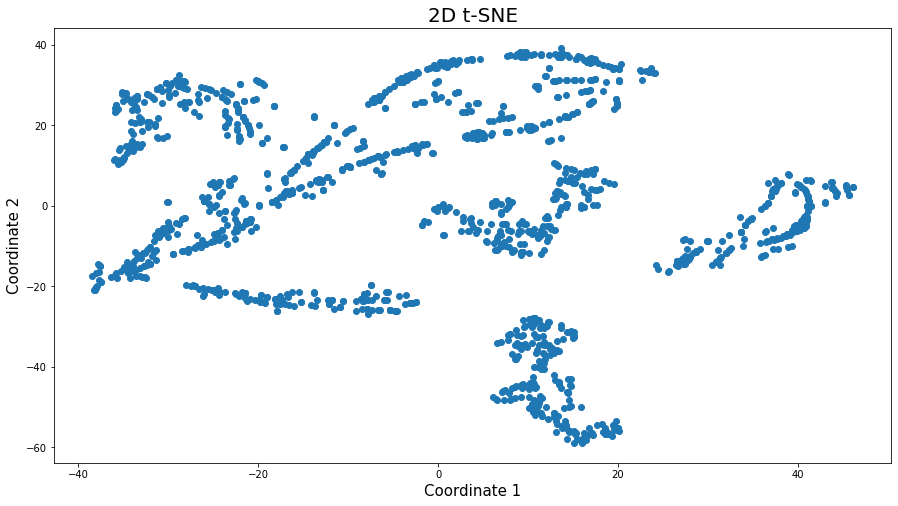

In [7]:
tsne = TSNE(n_components=2, verbose=1, learning_rate='auto')
principalComponents = tsne.fit_transform(cleanedDataSub)
principalDf = pd.DataFrame(data=principalComponents)
principleArray = principalDf.to_numpy()

fig = plt.figure(figsize = (15,8))
plt.scatter(principleArray[:, 0], principleArray[:, 1])
plt.xlabel('Coordinate 1', fontsize = 15)
plt.ylabel('Coordinate 2', fontsize = 15)
plt.title('2D t-SNE', fontsize = 20)
plt.show()

For t-SNE i also took the same sample with 1500 entries as for the PCA and MDS, because otherwise the computation would take forever. The same data as for the PCA and MDS was used. The t-SNE produces something much more different, than the MDS and PCA. While the MDS and PCA had only one big cluster. The t-SNE produces many small and medium clusters.

In the following some outputs from the t-SNE are shown, which are different to the first one.

![T-SNE 1](./img/census-income-tsne1.png)

![T-SNE 2](./img/census-income-tsne2.png)

![T-SNE 3](./img/census-income-tsne3.png)

The t-SNE seems always to produce round about 5 clusters that look quite the same. The positions of the clusters are different, but the clusters look almost the same.